In [1]:
# TENNIS BALL DETECTION. This approach seems the best.

import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
%matplotlib inline



# Define the range for the tennis ball color in HSV
lower_yellow_green = np.array([25, 70, 120])
upper_yellow_green = np.array([60, 255, 255])

# Start capturing video from the USB camera (usually index 1)
cap = cv2.VideoCapture(0)  # Try changing to 2, 3, etc., if 1 doesn't work

if not cap.isOpened():
    print("Error: Could not open USB camera.")
else:
    try:
        while True:
            # Capture frame-by-frame
            ret, frame = cap.read()
            if not ret:
                print("Error: Failed to capture image.")
                break

            # Convert the frame to the HSV color space
            hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

            # Create a mask for the tennis ball color
            mask = cv2.inRange(hsv, lower_yellow_green, upper_yellow_green)

            # Perform morphological operations to remove noise and improve detection
            kernel = np.ones((5, 5), np.uint8)
            mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
            mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

            # Find contours
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Track the tennis ball by finding the largest contour
            if contours:
                largest_contour = max(contours, key=cv2.contourArea)
                area = cv2.contourArea(largest_contour)
                if area > 300:  # Adjust the area threshold as needed
                    (x, y), radius = cv2.minEnclosingCircle(largest_contour)
                    center = (int(x), int(y))
                    radius = int(radius)

                    # Draw the circle and centroid on the frame
                    cv2.circle(frame, center, radius, (0, 255, 0), 4)
                    cv2.circle(frame, center, 5, (0, 128, 255), -1)

            # Display the resulting frame
    #         cv2.imshow("Tennis Ball Tracking", frame)
            #Show the image with matplotlib
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            display.clear_output(wait=True)
            plt.imshow(frame)
            plt.show()

            # Break the loop if 'q' is pressed
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    except KeyboardInterrupt:
        # Release the webcam and close windows
        cap.release()
        cv2.destroyAllWindows()


Error: Could not open USB camera.


[ WARN:0@1.874] global cap_v4l.cpp:999 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@1.882] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range


In [1]:
# Find a valid camera indice
import os
devs = os.listdir('/dev')
vid_indices = [int(dev[-1]) for dev in devs 
               if dev.startswith('video')]
vid_indices = sorted(vid_indices)
vid_indices

[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 4, 5, 6, 8]

In [ ]:
# TENNIS BALL DETECTION, HOUGH CIRCLES

import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
%matplotlib inline




# Define the range for the tennis ball color in HSV
lower_yellow_green = np.array([25, 70, 120])
upper_yellow_green = np.array([60, 255, 255])

# Start capturing video from the USB camera (usually index 1)
cap = cv2.VideoCapture(0)  # Try changing to 2, 3, etc., if 1 doesn't work

if not cap.isOpened():
    print("Error: Could not open USB camera.")
else:
    try:
        while True:
            # Capture frame-by-frame
            ret, image = cap.read()
            if not ret:
                print("Error: Failed to capture image.")
                break


            # Convert the image to the HSV color space
            hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

            # Define the flexible range for the tennis ball color (morning and afternoon)
            lower_yellow_green = np.array([20, 50, 60])
            upper_yellow_green = np.array([60, 255, 255])

            # Create a mask for the tennis ball color
            mask = cv2.inRange(hsv, lower_yellow_green, upper_yellow_green)

            # Apply the mask to get the yellow-green parts of the image
            masked_image = cv2.bitwise_and(image, image, mask=mask)

            # Convert the masked image to grayscale
            gray = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

            # Apply Gaussian blur to the grayscale image
            gray_blurred = cv2.GaussianBlur(gray, (9, 9), 2)

            # Use the HoughCircles function to detect circles
            circles = cv2.HoughCircles(
                gray_blurred, 
                cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, 
                param1=100, param2=30, minRadius=15, maxRadius=50
            )

            # Ensure at least some circles were found
            if circles is not None:
                # Convert the (x, y) coordinates and radius of the circles to integers
                circles = np.round(circles[0, :]).astype("int")

                # Loop over the circles and draw them on the image
                for (x, y, r) in circles:
                    cv2.circle(image, (x, y), r, (0, 255, 0), 4)
                    cv2.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
            
            frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            display.clear_output(wait=True)
            plt.imshow(frame)
            plt.show()

            # Break the loop if 'q' is pressed
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    except KeyboardInterrupt:
        # Release the webcam and close windows
        cap.release()
        cv2.destroyAllWindows()

In [1]:
# Line Detection Code HERE
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
%matplotlib inline


# Tennis Ball Deteciton

# Define the range for the tennis ball color in HSV
lower_yellow_green = np.array([25, 70, 120])
upper_yellow_green = np.array([60, 255, 255])

# Start capturing video from the USB camera (usually index 1)
cap = cv2.VideoCapture(0)  # Try changing to 2, 3, etc., if 1 doesn't work

if not cap.isOpened():
    print("Error: Could not open USB camera.")
else:
    try:
        while True:
            # Capture frame-by-frame
            ret, frame = cap.read()
            if not ret:
                print("Error: Failed to capture image.")
                break


            # Grayscale conversion
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            # Canny edge detection
            edges = cv2.Canny(gray, 150, 160, apertureSize=3)

            # Hough Line Transform
            lines = cv2.HoughLines(edges, 1.5, np.pi / 180, 200)

            # Iterate through each detected line
            for line in lines:
                rho, theta = line[0]
                # Convert polar coordinates to Cartesian coordinates
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a * rho
                y0 = b * rho
                x1 = int(x0 + 1000 * (-b))
                y1 = int(y0 + 1000 * (a))
                x2 = int(x0 - 1000 * (-b))
                y2 = int(y0 - 1000 * (a))

                # Draw lines on the original image
                cv2.line(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)


            # Display the resulting frame
    #         cv2.imshow("Tennis Ball Tracking", frame)
            #Show the image with matplotlib
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            display.clear_output(wait=True)
            plt.imshow(frame)
            plt.show()

            # Break the loop if 'q' is pressed
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    except KeyboardInterrupt:
        # Release the webcam and close windows
        cap.release()
        cv2.destroyAllWindows()

        
        
        

    # Grayscale conversion
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Canny edge detection
    edges = cv2.Canny(gray, 150, 160, apertureSize=3)

    # Hough Line Transform
    lines = cv2.HoughLines(edges, 1.5, np.pi / 180, 200)

    # Iterate through each detected line
    for line in lines:
        rho, theta = line[0]
        # Convert polar coordinates to Cartesian coordinates
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        # Draw lines on the original image
        cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)



NameError: name 'image' is not defined

In [1]:
import numpy as np
from time import time
# class Camera:
#     def __init__(self, camera_index=0):
#         self.cap = cv2.VideoCapture(camera_index)
#         self.last_frame = None
#         self.last_scanned_time = None
#     
#     def capture_frame(self):
#         ret, frame = self.cap.read()
#         if ret:
#             self.last_frame = frame
#             self.last_scanned_time = time()
#         return ret, frame
# 
#     def release(self):
#         self.cap.release()
#         cv2.destroyAllWindows()

    
        
    
class TennisBallDetector:
    def __init__(self, lower_color=(20, 100, 100), upper_color=(40, 255, 255), min_radius=10, max_radius=50, min_area=1000):
        self.camera = None
        self.camera_indice = 0 # Try changing to 1, 2, 3, etc., if 0 doesn't work
        self.lower_color = np.array(lower_color)
        self.upper_color = np.array(upper_color)
        self.min_radius = min_radius
        self.max_radius = max_radius
        self.min_area = min_area
        self.balls = []
        self.frame_center = None
        self.last_scanned_time = None
        self.kernel = np.ones((5, 5), np.uint8)
        
        if not cap.isOpened():
            print("Error: Could not open USB camera.")

    def detect(self, frame=None):
        if not camera:
            self.camera = cv2.VideoCapture(self.camera_indice)  
        if not frame:
            ret, frame = self.camera.read()
            if not ret:
                print("Error: Failed to capture image.")
                return
        self.last_scanned_time = time()
        self.frame_center = (frame.shape[1] // 2, frame.shape[0] // 2)
        
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, self.lower_color, self.upper_color)

        # Perform morphological operations
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, self.kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, self.kernel)

        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        self.balls = []

        for contour in contours:
            area = cv2.contourArea(contour)
            if area > self.min_area:
                ((x, y), radius) = cv2.minEnclosingCircle(contour)
                if self.min_radius < radius < self.max_radius:
                    self.balls.append(((int(x), int(y)), int(radius)))

        # Sort balls by size (largest first) if multiple balls are detected
        self.balls.sort(key=lambda ball: ball[1], reverse=True)

    def get_ball_count(self):
        return len(self.balls)

    def get_ball_locations(self):
        return [ball[0] for ball in self.balls]

    def get_ball_distance_from_center(self, ball_index):
        if 0 <= ball_index < len(self.balls):
            ball_center = self.balls[ball_index][0]
            dx = ball_center[0] - self.frame_center[0]
            dy = ball_center[1] - self.frame_center[1]
            distance_pixels = np.sqrt(dx**2 + dy**2)
            angle_radians = np.arctan2(dy, dx)
            return distance_pixels, angle_radians
        else:
            return None

    def draw_balls(self, frame):
        for i, (center, radius) in enumerate(self.balls):
            color = (0, 255, 0) if i == 0 else (0, 255, 255)  # Green for largest, Yellow for others
            cv2.circle(frame, center, radius, color, 2)
            cv2.circle(frame, center, 5, (0, 0, 255), -1)
        return frame

    def get_last_scanned_time(self):
        return self.last_scanned_time






if __name__ == "__main__":
    detector = TennisBallDetector()
    cap = cv2.VideoCapture(0)  # Use 0 for default camera

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        detector.detect(frame)
        frame = detector.draw_balls(frame)

        print(f"Number of tennis balls: {detector.get_ball_count()}")
        print(f"Ball locations: {detector.get_ball_locations()}")
        print(f"Last scanned time: {detector.get_last_scanned_time():.2f}")

        if detector.get_ball_count() > 0:
            distance, angle = detector.get_ball_distance_from_center(0)
            print(f"Distance of largest ball from center: {distance:.2f} pixels")
            print(f"Angle of largest ball from center: {angle:.2f} radians")

        cv2.imshow('Tennis Ball Detector', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

NameError: name 'cap' is not defined

In [1]:
import cv2
import numpy as np
from time import time
from IPython import display
from matplotlib import pyplot as plt


class TennisBallDetector:
    def __init__(self, lower_color=(20, 100, 100), upper_color=(40, 255, 255), min_radius=10, max_radius=50, min_area=1000, line_distance=100):
        self.camera = cv2.VideoCapture(0)  # Try changing to 2, 3, etc., if 1 doesn't work
        self.lower_color = np.array(lower_color)
        self.upper_color = np.array(upper_color)
        self.min_radius = min_radius
        self.max_radius = max_radius
        self.min_area = min_area
        self.balls = []
        self.frame_center = None
        self.last_scanned_time = None
        self.kernel = np.ones((5, 5), np.uint8)
        self.line_distance = line_distance
        self.frame = None
        
        if not self.camera.isOpened():
            print("Error: Could not open USB camera.")

    def detect(self, retry=True, max_num_retries=10, retry_interval=1):
        counter = 0
        
        while counter < max_num_retries:

            ret, self.frame = self.camera.read()
            if not ret:
                print("Error: Failed to capture image.")
                return
            self.last_scanned_time = time()
            self.frame_center = (self.frame.shape[1] // 2, self.frame.shape[0] // 2)

            hsv = cv2.cvtColor(self.frame, cv2.COLOR_BGR2HSV)
            mask = cv2.inRange(hsv, self.lower_color, self.upper_color)

            # Perform morphological operations
            mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, self.kernel)
            mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, self.kernel)

            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            self.balls = []

            for contour in contours:
                area = cv2.contourArea(contour)
                if area > self.min_area:
                    ((x, y), radius) = cv2.minEnclosingCircle(contour)
                    if self.min_radius < radius < self.max_radius:
                        self.balls.append(((int(x), int(y)), int(radius)))

            # Sort balls by size (largest first) if multiple balls are detected
            self.balls.sort(key=lambda ball: ball[1], reverse=True)
            if len(self.balls) > 0:
                return True
            else:
                counter += 1
        return False

    def get_ball_count(self):
        return len(self.balls)

    def get_ball_locations(self):
        return [ball[0] for ball in self.balls]

    def get_ball_distance_from_center(self, ball_index):
        if 0 <= ball_index < len(self.balls):
            ball_center = self.balls[ball_index][0]
            dx = ball_center[0] - self.frame_center[0]
            dy = ball_center[1] - self.frame_center[1]
            distance_pixels = np.sqrt(dx**2 + dy**2)
            angle_radians = np.arctan2(dy, dx)
            return distance_pixels, angle_radians
        else:
            return None

    def draw_balls(self, frame=None):
        if not frame:
            frame = self.frame
        for i, (center, radius) in enumerate(self.balls):
            color = (0, 255, 0) if i == 0 else (0, 255, 255)  # Green for largest, Yellow for others
            cv2.circle(frame, center, radius, color, 2)
            cv2.circle(frame, center, 5, (0, 0, 255), -1)
        return frame

    def get_last_scanned_time(self):
        return self.last_scanned_time

    def draw_vertical_lines(self, frame=None):
        if not frame:
            frame = self.frame
        height, width = frame.shape[:2]
        left_x = width // 2 - self.line_distance // 2
        right_x = width // 2 + self.line_distance // 2
        
        cv2.line(frame, (left_x, 0), (left_x, height), (255, 0, 0), 2)
        cv2.line(frame, (right_x, 0), (right_x, height), (255, 0, 0), 2)
        
        return frame

    def is_ball_between_lines(self, ball_index=0):
        if 0 <= ball_index < len(self.balls):
            ball_center, ball_radius = self.balls[ball_index]
            height, width = self.camera.get(cv2.CAP_PROP_FRAME_HEIGHT), self.camera.get(cv2.CAP_PROP_FRAME_WIDTH)
            left_x = width // 2 - self.line_distance // 2
            right_x = width // 2 + self.line_distance // 2
            
            # Check if the entire ball is between the lines
            return (left_x <= ball_center[0] - ball_radius) and (ball_center[0] + ball_radius <= right_x)
        else:
            return False

    # returns tennis ball distance from center lines. -ve means on left. +ve means on right.
    def get_ball_distance_from_lines(self, ball_index=0):
        if 0 <= ball_index < len(self.balls):
            ball_center, _ = self.balls[ball_index]
            height, width = self.camera.get(cv2.CAP_PROP_FRAME_HEIGHT), self.camera.get(cv2.CAP_PROP_FRAME_WIDTH)
            left_x = width // 2 - self.line_distance // 2
            right_x = width // 2 + self.line_distance // 2
            
            if ball_center[0] < left_x:
                return -(left_x - ball_center[0])
            elif ball_center[0] > right_x:
                return ball_center[0] - right_x
            else:
                return 0  # Ball is between the lines
        else:
            return None

    def set_line_distance(self, distance):
        self.line_distance = distance

detector = TennisBallDetector(line_distance=150)




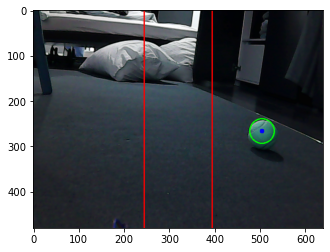

Ball between lines: False
Distance from nearest line: 110.0


In [2]:
detector.detect()
frame = detector.draw_balls()
frame = detector.draw_vertical_lines()

# frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display.clear_output(wait=True)
plt.imshow(frame)
plt.show()


if detector.get_ball_count() > 0:
    is_between = detector.is_ball_between_lines()
    distance = detector.get_ball_distance_from_lines()
    print(f"Ball between lines: {is_between}")
    print(f"Distance from nearest line: {distance}")